# Vazkopružnost

V následujícím budeme vyšetřovat numerickou odezvu vazkopružného materiálu. K této problematice existuje mnoho různých přístupů. Ukážeme pouze jeden z možných a to při aplikaci na vazkopružný 2D model s uvažováním setrvačných sil.

Předpoklady všech představených modelů jsou následující:

* Uvažujeme teorii malých deformací.
* Předpokládáme, že Poissonovo číslo je konstantní. Pro porovnání s jinými materiálovými modely doporučujeme např.\cite{Zemanova2017}
* Materiálový bod je popsán pomocí zobecněného Maxwellova řetězce sestávajícího z pružiny s tuhostí $G_\infty$ a několika Maxwellovými články. Každý článek je charakterizován pružinou s tuhostí $G_p$ a tlumičem s viskozitou $\eta_p$. Články jsou indexovány parametrem $p\in\mathcal{P}$, kde $\mathcal{P}=\langle 0,P\rangle\subset\mathbb{N}$.

Pod těmito předpoklady je chování polymeru popsáno následující slabou formou

$$
    \int_{\Omega_{\text{foil}}} \delta{\boldsymbol \varepsilon}:\left(G_\infty\mathbf{D}_\nu:{\boldsymbol \varepsilon} + \sum_{p\in\mathcal{P}}{\boldsymbol \sigma}_p\right) \ \mathrm{d}\Omega - \delta\mathcal{F}_\mathrm{ext} = 0,
$$

doplněnou o $P$ obyčejných diferenciální rovnic, které popisují konstitutivní vývoj napětí

$$
    \frac{\dot{{\boldsymbol \sigma}}_p}{G_p} + \frac{{\boldsymbol \sigma}_p}{\eta_p} = \mathbf{D}_\nu:\dot{{\boldsymbol \varepsilon}},\ \ \ p\in\mathcal{P}.
$$

V této rovnici $\delta \mathcal{F}_\mathrm{ext}$ značí virtuální práci vnějších sil pracujících na virtuálním posunutí $\delta\mathbf{u}$, tenzor malých deformací ${\boldsymbol \varepsilon}$ je symetrický gradient posunů ${\boldsymbol \varepsilon} = \nabla_\mathrm{s}\mathbf{u}$. Bezrozměrný tenzor $\mathbf{D}_\nu$ souvisí s tenzorem tuhosti izotropního materiálu s uvažováním jednotkového smykového modulu. Napětí přenášené $p$-tým článkem je označen ${\boldsymbol \sigma}_p$.

## Diskretizace
Pro oba představené modely platí, že časovou doménu nejprve rozdělíme na celočíselný počet časových okamžiků $\mathcal{T}=\{ 0, \ldots, t_\mathrm{max}\}$, 
kde $t_\mathrm{max}$ je konečný čas naší výpočetní domény.

### Zpětná Eulerova metoda
Pro zpětnou Eulerovu metodu je časová derivace nahrazena zpětnou konečnou diferencí jako 

$$
    \dot{\bullet}(t_{i+1})\approx\frac{\bullet(t_{i+1}) - \bullet(t_{i})}{\Delta t_i}.
$$

Pro zkrácení zápisu, časový krok $\Delta t_i$  je definován jako $t_{i+1} - t_i$ a explicitní závislost na času není explicitně zapisována, je nahrazena spodním indexem, tedy $\bullet (t_i)\equiv\bullet_i$. 

Když použijeme tuto aproximační náhradu, poto je naše diferenciální rovnice pro Maxwellův článek vyčíslená v čase $t_{i+1}$ rovna

$$
    \frac{\boldsymbol{\sigma}_{p,i+1} - \boldsymbol{\sigma}_{p,i}}{G_p\Delta t_i} + \frac{1}{\eta_p}\boldsymbol{\sigma}_{p,i+1} = \frac{1}{\Delta t_i}\mathbf{D}_\nu:\left(\boldsymbol{\varepsilon}_{i+1} - \boldsymbol{\varepsilon}_{i}\right).
$$

Můžeme tedy explicitně vyjádřit $\boldsymbol{\sigma}_{i+1}$ jako

$$
\boldsymbol{\sigma}_{p,i+1} = \frac{1}{\zeta_{p,i}}\left(\mathbf{D}_\nu:(\boldsymbol{\varepsilon}_{i+1} - \boldsymbol{\varepsilon}_{i})G_p + \boldsymbol{\sigma}_{p,i}\right),
$$

kde $\zeta_{p,i}=1+\Delta t_i/\tau_p$ je pomocný bezrozměrný parametr. Tenzor napětí může být přímo dosazen do rovnice rovnováhy, čímž získáme slabou formu pro $\boldsymbol{\varepsilon}_{i+1}$. Rovnice

$$
    \int_{\Omega_{\mathrm{foil}}} \delta\boldsymbol{\varepsilon}:\left(G_\infty +\sum_{p\in\mathcal{P}} \frac{G_p}{\zeta_{p,i}}\right)\mathbf{D}_\nu:\boldsymbol{\varepsilon}_{i+1}\ \mathrm{d}\Omega \nonumber \\
    - \int_{\Omega_{\mathrm{foil}}} \delta\boldsymbol{\varepsilon}:\sum_{p\in\mathcal{P}}\frac{G_p}{\zeta_{p,i}}\mathbf{D}_\nu:\boldsymbol{\varepsilon}_{i} \ \mathrm{d}\Omega \nonumber \\
    + \int_{\Omega_{\mathrm{foil}}}
    \delta\boldsymbol{\varepsilon}:\sum_{p\in\mathcal{P}}\frac{\boldsymbol{\sigma}_{p,i}}{\zeta_{p,i}}\ \mathrm{d}\Omega - \delta\mathcal{F}_\mathrm{ext} = 0
$$

tedy řídí MKP analýzu pro získání $\boldsymbol{\varepsilon}_{i+1}$. Nakonec je napěťový tenzor aktualizován pomocí výše uvedené rovnice. Tato procedura je opakována pro všechny časové okamžiky.

## Exponenciální algoritmus
Pro odvození exponenciálního algoritmu uvažujeme lineární průběh deformace na intervalu $\langle t_i, t_{i+1}\rangle$, dále vizkózní napěťový tenzor je spočten přesným řešením přislušné ODR. Lineárně rozložená deformace indukuje konstantní rychlost deformace a řídící rovnice pro Maxwellův článek nabýv tvaru

$$
\frac{\dot{\boldsymbol \sigma}_{p}(t_i + s_i)}{G_p} + \frac{{\boldsymbol \sigma}_{p}(t_i + s_i)}{\eta_p}=\frac{1}{\Delta t_i}\mathbf{D}_\nu:\left({\boldsymbol \varepsilon}_{i+1} - {\boldsymbol \varepsilon}_{i}\right),
$$

kde $s_i$ je pomocný časový parametr začínající v $t_i$ a jdoucí dopředu v čase. Vzájemný vztah mezi originálním časem $t$ a proměnnou $s_i$ je $s_i=t-t_i$. 
Uvažujme dále počáteční podmínku ${\boldsymbol \sigma}_{p}(s_i=0)={\boldsymbol \sigma}_{p,i}$, potom je napětí vyčíslené v $s_i=\Delta t_i$ tedy v $t=t_{i+1}$ rovno

$$
    {\boldsymbol \sigma}_{p,i+1}= {\boldsymbol \sigma}_{p,i}\mathrm{e}^{-\frac{\Delta t_i}{\tau_p}} 
$$

$$
    + \frac{\eta_p}{\Delta t_i}\left(1-\mathrm{e}^{-\frac{\Delta t_i}{\tau_p}}\right)\mathbf{D}_\nu:({\boldsymbol \varepsilon}_{i+1} - {\boldsymbol \varepsilon}_i).
$$

Zpětná substituce do podmínky rovnováhy vyčíslené v čase $t_{i+1}$ dává konečně

$$
    \int_{\Omega_{\mathrm{foil}}} \delta{\boldsymbol \varepsilon}:\left(G_\infty +\sum_{p\in\mathcal{P}} \frac{\eta_p}{\Delta t_i}\xi_{p,i}\right)\mathbf{D}_\nu:{\boldsymbol \varepsilon}_{i+1}\ \mathrm{d}\Omega \nonumber \\
    - \int_{\Omega_{\mathrm{foil}}} \delta{\boldsymbol \varepsilon}:\sum_{p\in\mathcal{P}}\frac{\eta_p}{\Delta t_i}\xi_{p,i}\mathbf{D}_\nu:{\boldsymbol \varepsilon}_{i} \ \mathrm{d}\Omega \nonumber \\
    + \int_{\Omega_{\mathrm{foil}}}
    \delta{\boldsymbol \varepsilon}:\sum_{p\in\mathcal{P}}\mathrm{e}^{-\frac{\Delta t_i}{\tau_p}}{\boldsymbol \sigma}_{p,i}\ \mathrm{d}\Omega - \delta\mathcal{F}_\mathrm{ext} = 0,
$$

kde je představena pomocná proměnná $\xi_{p,i}=1-\mathrm{e}^{-\frac{\Delta t_i}{\tau_p}}$. 


## Dynamický řešič - Implementace [TOBE: Done]
Velká část kódu je shodná se všemi předchozími příklady, proto je budeme komentovat jen stroze. Opět je v první řadě nutné načíst všechny knihovny a zvolit výpočetní parametry.

In [1]:
import dolfinx as dfx
import matplotlib.pyplot as plt
import math
from mpi4py import MPI
import pyvista
import ufl
import numpy as np
from petsc4py.PETSc import ScalarType
import dolfinx.fem.petsc as dfp


start_time = 0.0
end_time = 30.0
tau = 1.0e-1  # časový krok

# Dimenze úlohy
d = 2

# Materiálové parametry, Gs, Ts jsou parametry Maxwellových článků
n = 22
Ginf = 682.18e3
Gs = 1.0e3 * np.array(
    [6933.9, 3898.6, 2289.2, 1672.7, 761.6, 2401.0, 65.2, 248.0, 575.6, 56.3, 188.6, 445.1, 300.1, 401.6, 348.1,
     111.6, 127.2, 137.8, 50.5, 322.9, 100.0, 199.9])
Ts = np.array(
    [1.0e-9, 1.0e-8, 1.0e-7, 1.0e-6, 1.0e-5, 1.0e-4, 1.0e-3, 1.0e-2, 1.0e-1, 1.0, 1.0e1, 1.0e2, 1.0e3, 1.0e4, 1.0e5,
     1.0e6, 1.0e7, 1.0e8, 1.0e9, 1.0e10, 1.0e11, 1.0e12])
eta = np.zeros(n)
for k in range(0, n):
    eta[k] = Ts[k]*Gs[k]

rho = 1.0e6
nu = 0.2

# Lameho parametry pro G=1
G_unit = 1.0
lam, mu = (2 * G_unit * nu / (1 - 2 * nu), G_unit)

Pro potřeby řešiče je vhodné nějaké materiálové konstanty spočítat dopředu.

In [2]:
# Other constants
A = []
B = []
C = []
sumA = 0.0
sumB = 0.0
sumC = 0.0

for k in range(0, n):
    A.append(math.exp(-Gs[k] / eta[k] * tau))
    sumA += A[k]
    B.append(-eta[k] * math.expm1(-Gs[k] / eta[k] * tau))
    sumB += B[k]
    C.append(0.5 * eta[k] * (tau + eta[k] / Gs[k] * math.expm1(-Gs[k] / eta[k] * tau)))
    sumC += C[k]

Opět vytvoříme výpočetní síť a potřebné funkční prostory.

In [3]:
mesh = dfx.mesh.create_unit_square(MPI.COMM_WORLD, 20, 20, dfx.mesh.CellType.quadrilateral)
tdim = mesh.topology.dim
fdim = tdim - 1

w = dfx.fem.FunctionSpace(mesh, ("P", 1, (2,)))
ten = dfx.fem.FunctionSpace(mesh, ("P", 1, (2,2)))

dd_u = ufl.TrialFunction(w)
v = ufl.TestFunction(w)

Při tvorbě okrajových podmínek využijeme stejného postupu jako v minulosti. Označíme spodní hranu číslem 11 a horní hranu číslem 22.

In [4]:
# --------------------
# Boundary conditions
# --------------------
boundaries = [(11, lambda x: np.isclose(x[1], 0)),
              (22, lambda x: np.isclose(x[1], 1))]

def bottom(x):
    return np.isclose(x[1], 0.0)

facet_indices, facet_markers = [], []
fdim = mesh.topology.dim - 1
for (marker, locator) in boundaries:
    facets = dfx.mesh.locate_entities(mesh, fdim, locator)
    facet_indices.append(facets)
    facet_markers.append(np.full_like(facets, marker))
facet_indices = np.hstack(facet_indices).astype(np.int32)
facet_markers = np.hstack(facet_markers).astype(np.int32)
sorted_facets = np.argsort(facet_indices)
facet_tag = dfx.mesh.meshtags(mesh, fdim, facet_indices[sorted_facets], facet_markers[sorted_facets])

mesh.topology.create_connectivity(mesh.topology.dim-1, mesh.topology.dim)
with dfx.io.XDMFFile(mesh.comm, "facet_tags.xdmf", "w") as xdmf:
    xdmf.write_mesh(mesh)
    xdmf.write_meshtags(facet_tag, mesh.geometry)

ds = ufl.Measure("ds", domain=mesh, subdomain_data=facet_tag)

# Dirichlet boundary condition for bottom
bottom_dofs = dfx.fem.locate_dofs_geometrical(w, bottom)
u_bot = dfx.fem.Function(w)
bcs = [dfx.fem.dirichletbc(u_bot, bottom_dofs)]

Následně můžeme vytvořit všechny potřebné funkce a také soubory pro ukládání výsledků. Funkce <code>temp1</code>, <code>temp2</code> a <code>temp3</code> jsou jen pomocné funkce pro pomocné výpočty. Jedná se o funkce tenzorového charakteru pro update napěťových polí. Funkce <code>f_v</code> je sada funkcí reprezentující viskozní napětí.

In [5]:
u = dfx.fem.Function(w)
d_u = dfx.fem.Function(w)
dd_u_ = dfx.fem.Function(w)
dd_u_old = dfx.fem.Function(w)
f_v = [dfx.fem.Function(ten) for i in range(n)]

t = start_time

ff = dfx.fem.Constant(mesh, ScalarType([0.0, 1.0e6]))

out_file = "test2.xdmf"
with dfx.io.XDMFFile(mesh.comm, out_file, "w") as xdmf:
    xdmf.write_mesh(mesh)
    
temp1 = dfx.fem.Function(ten)
temp2 = dfx.fem.Function(ten)
temp3 = dfx.fem.Function(ten)

Výpočet počáteční podmínky.

In [6]:
LHS0 = rho*ufl.dot(v, dd_u)*ufl.dx
RHS0 = ufl.dot(v, ff)*ds(1)
problem = dfx.fem.petsc.LinearProblem(
    LHS0, RHS0, u=dd_u_old, bcs=bcs, petsc_options={"ksp_type": "preonly", "pc_type": "lu"}
)
problem.solve()

Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, quadrilateral, 1, gll_warped, unset, False), (2,)), 0), blocked element (Basix element (P, quadrilateral, 1, gll_warped, unset, False), (2,))), 4)

Následuje sestavení slabé formy. Ta je pouhým přepisem výše uvedených rovnic.

In [7]:
def epsilon(a):
    return ufl.sym(ufl.grad(a))


def sigma(a):
    return lam*ufl.tr(epsilon(a))*ufl.Identity(d) + 2.0*mu*epsilon(a)

LHS = rho*ufl.dot(v, dd_u)*ufl.dx + ufl.inner(epsilon(v), (0.25*Ginf*tau*tau + sumC)*sigma(dd_u))*ufl.dx
RHS = -ufl.inner(epsilon(v), Ginf*sigma(u))*ufl.dx - ufl.inner(epsilon(v), (Ginf*tau + sumB)*sigma(d_u))*ufl.dx - \
        ufl.inner(epsilon(v), (0.25*Ginf*tau*tau + sumC)*sigma(dd_u_old))*ufl.dx + ufl.dot(v, ff) * ds(22)
RHS -= ufl.inner(epsilon(v), sum(A[k]*f_v[k] for k in range(0, n)))*ufl.dx

In [17]:
def monitor_point(x):
    return np.isclose(x[0], 0.5) & np.isclose(x[1], 1.0)

dim = mesh.topology.dim
point_dof = dfx.fem.locate_dofs_geometrical(w, monitor_point)[0]
print(point_dof)
point_dofs = np.arange(point_dof * dim, (point_dof + 1) * dim)
print(point_dofs)

v_i, submap_i = w.sub(1).collapse()
mp_dof_y = dfx.fem.locate_dofs_geometrical((w.sub(1), v_i), monitor_point)
#dfx.fem.dirichletbc(ScalarType(value_i), dofs[0], subspace)

time = []
disp = []

while t <= end_time:
    problem = dfx.fem.petsc.LinearProblem(
        LHS, RHS, u=dd_u_, bcs=bcs, petsc_options={"ksp_type": "preonly", "pc_type": "lu"}
    )
    problem.solve()

    # Update of rest quantities
    temp1_exp = dfx.fem.Expression(sigma(d_u), ten.element.interpolation_points())
    temp1.interpolate(temp1_exp)
    temp2_exp = dfx.fem.Expression(sigma(dd_u_), ten.element.interpolation_points())
    temp2.interpolate(temp2_exp)
    temp3_exp = dfx.fem.Expression(sigma(dd_u_old), ten.element.interpolation_points())
    temp3.interpolate(temp3_exp)
    for k in range(0, n):
        f_v[k].x.array[:] = A[k]*f_v[k].x.array + B[k]*temp1.x.array + C[k]*temp2.x.array + C[k]*temp3.x.array
    u.x.array[:] = u.x.array + d_u.x.array*tau + 0.25*(dd_u_old.x.array + dd_u_.x.array)*tau*tau
    d_u.x.array[:] = d_u.x.array + 0.5 * (dd_u_old.x.array + dd_u_.x.array) * tau
    dd_u_old.x.array[:] = dd_u_.x.array

    # Save solution to file (XDMF/HDF5)
    #with dfx.io.XDMFFile(mesh.comm, out_file, "a") as xdmf:
        #xdmf.write_function(u, t)
    
    time.append(t)
    disp.append(u.x.array[mp_dof_y[0]])

    # Increment of time
    t = t + tau


375
[750 751]


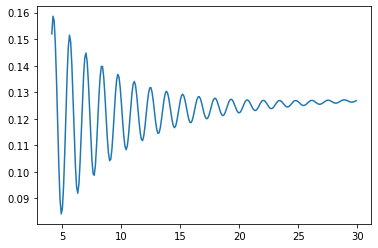

In [18]:
plt.plot(time, disp)
plt.show()

In [ ]:




# --------------------
# Classes and methods
# --------------------
def local_project(u_i, V_i):
    ut = ufl.TrialFunction(V_i)
    v_i = ufl.TestFunction(V_i)
    uh = dfx.fem.Function(V_i)
    problem = dfp.LinearProblem(
        ufl.inner(ut, v_i) * ufl.dx, ufl.inner(u_i, v_i) * ufl.dx, u=uh, bcs=[],
        petsc_options={"ksp_type": "preonly", "pc_type": "lu"}
    )
    problem.solve()
    return uh


def top(x):
    return np.isclose(x[2], 1.0)


def bottom(x):
    return np.isclose(x[2], 0.0)


def epsilon(a):
    return ufl.sym(ufl.grad(a))


def sigma(a):
    return lam*ufl.tr(epsilon(a))*ufl.Identity(d) + 2.0*mu*epsilon(a)


def sigma_ten(a):
    return local_project(lam*ufl.tr(ufl.grad(a))*ufl.Identity(d) + 2.0*mu*epsilon(a), ten)




# --------------------
# Boundary conditions
# --------------------
boundaries = [(11, lambda x: np.isclose(x[2], 0)),
              (22, lambda x: np.isclose(x[2], 1))]

facet_indices, facet_markers = [], []
fdim = mesh.topology.dim - 1
for (marker, locator) in boundaries:
    facets = dfx.mesh.locate_entities(mesh, fdim, locator)
    facet_indices.append(facets)
    facet_markers.append(np.full_like(facets, marker))
facet_indices = np.hstack(facet_indices).astype(np.int32)
facet_markers = np.hstack(facet_markers).astype(np.int32)
sorted_facets = np.argsort(facet_indices)
facet_tag = dfx.mesh.meshtags(mesh, fdim, facet_indices[sorted_facets], facet_markers[sorted_facets])

mesh.topology.create_connectivity(mesh.topology.dim-1, mesh.topology.dim)
with dfx.io.XDMFFile(mesh.comm, "facet_tags.xdmf", "w") as xdmf:
    xdmf.write_mesh(mesh)
    xdmf.write_meshtags(facet_tag, mesh.geometry)

ds = ufl.Measure("ds", domain=mesh, subdomain_data=facet_tag)

# Dirichlet boundary condition for bottom
bottom_dofs = dfx.fem.locate_dofs_geometrical(w, bottom)
u_bot = dfx.fem.Function(w)
bcs = [dfx.fem.dirichletbc(u_bot, bottom_dofs)]

# --------------------
# Initialization
# --------------------
u = dfx.fem.Function(w)
d_u = dfx.fem.Function(w)
dd_u_ = dfx.fem.Function(w)
dd_u_old = dfx.fem.Function(w)
f_v = [dfx.fem.Function(ten) for i in range(n)]

t = start_time

ff = dfx.fem.Constant(mesh, ScalarType([0.0, 1.0e6, 0.0]))

# --------------------
# XDMF output
# --------------------
# Create XDMF files for visualization output
out_file = "test2.xdmf"
with dfx.io.XDMFFile(mesh.comm, out_file, "w") as xdmf:
    xdmf.write_mesh(mesh)

# --------------------
# Initial condition
# --------------------
LHS0 = rho*ufl.dot(v, dd_u)*ufl.dx
RHS0 = ufl.dot(v, ff)*ds(1)
problem = dfx.fem.petsc.LinearProblem(
    LHS0, RHS0, u=dd_u_old, bcs=bcs, petsc_options={"ksp_type": "preonly", "pc_type": "lu"}
)
problem.solve()

# --------------------
# Variational form
# --------------------
LHS = rho*ufl.dot(v, dd_u)*ufl.dx + ufl.inner(epsilon(v), (0.25*Ginf*tau*tau + sumC)*sigma(dd_u))*ufl.dx
RHS = -ufl.inner(epsilon(v), Ginf*sigma(u))*ufl.dx - ufl.inner(epsilon(v), (Ginf*tau + sumB)*sigma(d_u))*ufl.dx - \
        ufl.inner(epsilon(v), (0.25*Ginf*tau*tau + sumC)*sigma(dd_u_old))*ufl.dx + ufl.dot(v, ff) * ds(22)
RHS -= ufl.inner(epsilon(v), sum(A[k]*f_v[k] for k in range(0, n)))*ufl.dx

temp1 = dfx.fem.Function(ten)
temp2 = dfx.fem.Function(ten)
temp3 = dfx.fem.Function(ten)

# --------------------
# Main load loop
# --------------------
while t <= end_time:
    print("Time instant ", t)

    problem = dfx.fem.petsc.LinearProblem(
        LHS, RHS, u=dd_u_, bcs=bcs, petsc_options={"ksp_type": "preonly", "pc_type": "lu"}
    )
    problem.solve()

    # Update of rest quantities
    temp1_exp = dfx.fem.Expression(sigma(d_u), ten.element.interpolation_points())
    temp1.interpolate(temp1_exp)
    temp2_exp = dfx.fem.Expression(sigma(dd_u_), ten.element.interpolation_points())
    temp2.interpolate(temp2_exp)
    temp3_exp = dfx.fem.Expression(sigma(dd_u_old), ten.element.interpolation_points())
    temp3.interpolate(temp3_exp)
    for k in range(0, n):
        f_v[k].x.array[:] = A[k]*f_v[k].x.array + B[k]*temp1.x.array + C[k]*temp2.x.array + C[k]*temp3.x.array
    u.x.array[:] = u.x.array + d_u.x.array*tau + 0.25*(dd_u_old.x.array + dd_u_.x.array)*tau*tau
    d_u.x.array[:] = d_u.x.array + 0.5 * (dd_u_old.x.array + dd_u_.x.array) * tau
    dd_u_old.x.array[:] = dd_u_.x.array

    # Save solution to file (XDMF/HDF5)
    with dfx.io.XDMFFile(mesh.comm, out_file, "a") as xdmf:
        xdmf.write_function(u, t)

    # Increment of time
    t = t + tau
